# Loading the dataset

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
x, y = load_iris(as_frame=True, return_X_y=True)

In [ ]:
# checking first 5 features
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x)
scaled_x = scaler.transform(x)

In [ ]:
# observing the first 5 features of transformed data
scaled_x = pd.DataFrame(scaled_x, columns = ['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)'])
scaled_x.head()

km_x = scaled_x
dbscan_x = scaled_x
hierarchical_x = scaled_x

# Clustering the dataset in 3 different algorithms

In [ ]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering

In [ ]:
km = KMeans(n_clusters=3)
km_result = km.fit_predict(scaled_x)

dbscan = DBSCAN(eps=0.4)
dbscan_result = dbscan.fit_predict(scaled_x)

hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical_result = hierarchical.fit_predict(scaled_x)

# Visualization of the created clusters

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline

km_x['cluster'] = km_result
km_df1 = km_x[km_x.cluster==0]
km_df2 = km_x[km_x.cluster==1]
km_df3 = km_x[km_x.cluster==2]

hierarchical_x['cluster'] = hierarchical_result
hierarchical_x
hierarchical_df1 = hierarchical_x[hierarchical_x.cluster==1]
hierarchical_df2 = hierarchical_x[hierarchical_x.cluster==2]
hierarchical_df3 = hierarchical_x[hierarchical_x.cluster==0]


dbscan_x['cluster'] = dbscan_result
dbscan_x

dbscan_df1 = dbscan_x[dbscan_x.cluster==1]
dbscan_df2 = dbscan_x[dbscan_x.cluster==2]
dbscan_df3 = dbscan_x[dbscan_x.cluster==0]


Text(37.722222222222214, 0.5, 'Clustering result using Hierarchical')

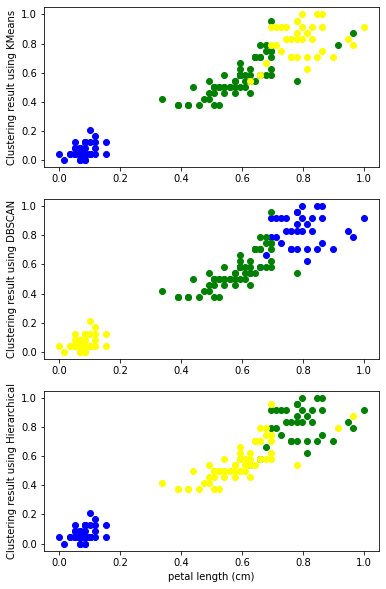

In [ ]:
from matplotlib.pyplot import figure
fig, (ax1, ax2,ax3) = plt.subplots(3, 1)
fig = plt.gcf()
fig.set_size_inches(6, 10)
fig.savefig('test2png.png', dpi=100)

ax1.scatter(km_df1['petal length (cm)'],km_df1['petal width (cm)'],color='blue')
ax1.scatter(km_df2['petal length (cm)'],km_df2['petal width (cm)'],color='green')
ax1.scatter(km_df3['petal length (cm)'],km_df3['petal width (cm)'],color='yellow')
ax1.set_ylabel('Clustering result using KMeans')

ax2.scatter(dbscan_df1['petal length (cm)'],dbscan_df1['petal width (cm)'],color='blue')
ax2.scatter(dbscan_df2['petal length (cm)'],dbscan_df2['petal width (cm)'],color='green')
ax2.scatter(dbscan_df3['petal length (cm)'],dbscan_df3['petal width (cm)'],color='yellow')
ax2.set_ylabel('Clustering result using DBSCAN')


ax3.scatter(hierarchical_df1['petal length (cm)'],hierarchical_df1['petal width (cm)'],color='blue')
ax3.scatter(hierarchical_df2['petal length (cm)'],hierarchical_df2['petal width (cm)'],color='green')
ax3.scatter(hierarchical_df3['petal length (cm)'],hierarchical_df3['petal width (cm)'],color='yellow')
ax3.set_xlabel('petal length (cm)')
ax3.set_ylabel('Clustering result using Hierarchical')

As we can see, both Hierarchical and KMeans have a noise in the 2nd and 3rd cluster unlike DBSCAN

# Results Comparison using ARI and Silhouette score

In [ ]:
# ARI
from sklearn.metrics.cluster import adjusted_rand_score
km_ari = adjusted_rand_score(y,km_result)
dbscan_ari = adjusted_rand_score(y,dbscan_result)
hierarchical_ari = adjusted_rand_score(y,hierarchical_result)

# Silhouette Score
from sklearn.metrics.cluster import silhouette_score
km_ss = silhouette_score(scaled_x,km_result)
dbscan_ss = silhouette_score(scaled_x,dbscan_result)
hierarchical_ss = silhouette_score(scaled_x,hierarchical_result)

In [ ]:
print(f"Kmeans adjusted score: {km_ari}")
print(f"DBSCAN adjustedscore: {dbscan_ari}")
print(f"Hierarchical adjusted score: {hierarchical_ari}\n")

print(f"Kmeans silhouette score: {km_ss}")
print(f"DBSCAN silhouette score: {dbscan_ss}")
print(f"Hierarchical silhouette score: {hierarchical_ss}")

Kmeans adjusted score: 0.672259778534282
DBSCAN adjustedscore: 0.6901683020339203
Hierarchical adjusted score: 0.672259778534282

Kmeans silhouette score: 0.7583332856387388
DBSCAN silhouette score: 0.7810118337974437
Hierarchical silhouette score: 0.7583332856387388


DBSCAN has the highest score among the 3 clustering algorithms followed by KMeans and Hierarchical at tie position.